In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
from citipy import citipy
import requests

In [2]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Find the nearest city for each lat and long pair
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then will add to the city list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

643

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
records_count = 1
set_count = 1

# look through all the cities in the list
for i, city in enumerate(cities):
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_count += 1
        records_count = 1
    # create endpoint URL 
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the URL, record and set number and the city
    print(f"Processing record {records_count} of Set {set_count} | {city}")
    records_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing record 1 of Set 1 | coquimbo
Processing record 2 of Set 1 | lagoa
Processing record 3 of Set 1 | lorengau
Processing record 4 of Set 1 | esperance
Processing record 5 of Set 1 | komsomolskiy
Processing record 6 of Set 1 | marsh harbour
Processing record 7 of Set 1 | tommot
Processing record 8 of Set 1 | butaritari
Processing record 9 of Set 1 | coruripe
Processing record 10 of Set 1 | ushuaia
Processing record 11 of Set 1 | rikitea
Processing record 12 of Set 1 | brownsville
Processing record 13 of Set 1 | beyneu
Processing record 14 of Set 1 | natal
Processing record 15 of Set 1 | hobart
Processing record 16 of Set 1 | severo-kurilsk
Processing record 17 of Set 1 | mataura
Processing record 18 of Set 1 | notre-dame-du-lac
Processing record 19 of Set 1 | minot
Processing record 20 of Set 1 | atuona
Processing record 21 of Set 1 | albany
Processing record 22 of Set 1 | busselton
Processing record 23 of Set 1 | port e

Processing record 39 of Set 4 | khani
Processing record 40 of Set 4 | longlac
City not found. Skipping...
Processing record 41 of Set 4 | hegang
Processing record 42 of Set 4 | bhabua
Processing record 43 of Set 4 | svetlaya
Processing record 44 of Set 4 | lewiston
Processing record 45 of Set 4 | kyshtovka
Processing record 46 of Set 4 | kamenskoye
City not found. Skipping...
Processing record 47 of Set 4 | hihifo
City not found. Skipping...
Processing record 48 of Set 4 | dongning
Processing record 49 of Set 4 | yomitan
City not found. Skipping...
Processing record 50 of Set 4 | grindavik
Processing record 1 of Set 5 | port-gentil
Processing record 2 of Set 5 | yining
Processing record 3 of Set 5 | toulepleu
City not found. Skipping...
Processing record 4 of Set 5 | isangel
Processing record 5 of Set 5 | puerto del rosario
Processing record 6 of Set 5 | sambava
Processing record 7 of Set 5 | dzhusaly
City not found. Skipping...
Processing record 8 of Set 5 | caravelas
Processing recor

Processing record 23 of Set 8 | bengkulu
Processing record 24 of Set 8 | los llanos de aridane
Processing record 25 of Set 8 | amurzet
Processing record 26 of Set 8 | upernavik
Processing record 27 of Set 8 | bam
Processing record 28 of Set 8 | ola
Processing record 29 of Set 8 | riyadh
Processing record 30 of Set 8 | miass
Processing record 31 of Set 8 | champerico
Processing record 32 of Set 8 | peniche
Processing record 33 of Set 8 | mananjary
Processing record 34 of Set 8 | mayo
Processing record 35 of Set 8 | alofi
Processing record 36 of Set 8 | marsa matruh
Processing record 37 of Set 8 | pitimbu
Processing record 38 of Set 8 | sinnar
Processing record 39 of Set 8 | hokitika
Processing record 40 of Set 8 | ponta delgada
Processing record 41 of Set 8 | abha
Processing record 42 of Set 8 | camabatela
Processing record 43 of Set 8 | san juan del sur
Processing record 44 of Set 8 | haines junction
Processing record 45 of Set 8 | danane
Processing record 46 of Set 8 | acarau
Processi

Processing record 15 of Set 12 | tolmachevo
Processing record 16 of Set 12 | maniitsoq
Processing record 17 of Set 12 | poya
Processing record 18 of Set 12 | iquique
Processing record 19 of Set 12 | launceston
Processing record 20 of Set 12 | cartagena
Processing record 21 of Set 12 | saint anthony
Processing record 22 of Set 12 | botwood
Processing record 23 of Set 12 | ashqelon
Processing record 24 of Set 12 | vanimo
Processing record 25 of Set 12 | mosquera
Processing record 26 of Set 12 | loei
Processing record 27 of Set 12 | mountain home
Processing record 28 of Set 12 | la ronge
Processing record 29 of Set 12 | birjand
Processing record 30 of Set 12 | muncar
Processing record 31 of Set 12 | mpulungu
Processing record 32 of Set 12 | sivaki
Processing record 33 of Set 12 | pastavy
Processing record 34 of Set 12 | orel-izumrud
Processing record 35 of Set 12 | rongcheng
Processing record 36 of Set 12 | kabanjahe
Processing record 37 of Set 12 | walvis bay
Processing record 38 of Set 

In [10]:
len(city_data)

589

In [11]:
# convert to DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coquimbo,-29.9533,-71.3436,55.40,94,0,2.30,CL,2021-04-13 01:53:05
1,Lagoa,39.0500,-27.9833,60.91,86,89,21.61,PT,2021-04-13 01:54:58
2,Lorengau,-2.0226,147.2712,75.58,91,100,2.08,PG,2021-04-13 01:54:58
3,Esperance,-33.8667,121.9000,55.40,100,75,17.27,AU,2021-04-13 01:54:58
4,Komsomolskiy,40.4272,71.7189,55.40,58,100,4.61,UZ,2021-04-13 01:54:59
5,Marsh Harbour,26.5412,-77.0636,74.46,66,0,18.10,BS,2021-04-13 01:54:59
6,Tommot,58.9564,126.2925,22.82,77,100,2.08,RU,2021-04-13 01:54:59
7,Butaritari,3.0707,172.7902,81.34,78,64,9.86,KI,2021-04-13 01:54:59
8,Coruripe,-10.1256,-36.1756,76.89,85,71,4.03,BR,2021-04-13 01:55:00
9,Ushuaia,-54.8000,-68.3000,46.40,57,40,19.57,AR,2021-04-13 01:55:00


In [12]:
city_data_df = city_data_df[['City','Country', 'Date', 'Lat','Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coquimbo,CL,2021-04-13 01:53:05,-29.9533,-71.3436,55.40,94,0,2.30
1,Lagoa,PT,2021-04-13 01:54:58,39.0500,-27.9833,60.91,86,89,21.61
2,Lorengau,PG,2021-04-13 01:54:58,-2.0226,147.2712,75.58,91,100,2.08
3,Esperance,AU,2021-04-13 01:54:58,-33.8667,121.9000,55.40,100,75,17.27
4,Komsomolskiy,UZ,2021-04-13 01:54:59,40.4272,71.7189,55.40,58,100,4.61
5,Marsh Harbour,BS,2021-04-13 01:54:59,26.5412,-77.0636,74.46,66,0,18.10
6,Tommot,RU,2021-04-13 01:54:59,58.9564,126.2925,22.82,77,100,2.08
7,Butaritari,KI,2021-04-13 01:54:59,3.0707,172.7902,81.34,78,64,9.86
8,Coruripe,BR,2021-04-13 01:55:00,-10.1256,-36.1756,76.89,85,71,4.03
9,Ushuaia,AR,2021-04-13 01:55:00,-54.8000,-68.3000,46.40,57,40,19.57


In [13]:
# create output file (CSV)
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label = "City_ID")

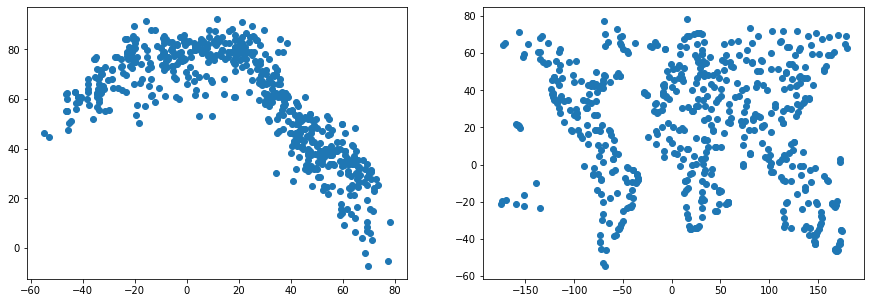

In [29]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].scatter(city_data_df['Lat'],city_data_df['Max Temp'])

ax[1].scatter(city_data_df['Lng'],city_data_df['Lat'])